In [1]:
import os
import h5py
import scipy.io

import numpy as np

from sklearn.model_selection import train_test_split

root = 'F:\\FDU\\计算神经科学\\wxr_20191015\\scz_Data'
data_path = 'F:\\FDU\\计算神经科学\\wxr_20191015\\scz_Data\\data'


# 计算person相关矩阵
def getPerson(filename='aal2_266.mat'):
    myfile = h5py.File(os.path.join(root, filename))
    data = [myfile[element[0]][:]
            for element in myfile[filename.split('.')[0]]]
    person = np.array([np.corrcoef(data_sample) for data_sample in data])
    return person


# 获得标签
def getLabel(filename='all_cov.mat'):
    all_cov = scipy.io.loadmat(os.path.join(root, filename))
    all_cov = all_cov['all_cov']
    labels = all_cov[:, 0]
    return labels


# 获得头动数据
def getFD(filename='meanFD_info.mat'):
    meanFD = h5py.File(os.path.join(root, filename))
    meanFD = meanFD['meanFD'][0]
    return meanFD


# 排除头动数据
def select(labels, meanFD):
    index = [(label == 0 and fd < 0.2) or (label == 1 and fd < 0.3)
             for label, fd in zip(labels, meanFD)]
    return index


# 展开person矩阵上三角
def triu(person):
    temp = [person[i][i + 1: len(person)] for i in range(len(person))]
    return np.concatenate(temp)

In [2]:
person = getPerson()
labels = getLabel()
fds = getFD()

In [4]:
index = select(labels, fds)
person = person[index]
labels = labels[index]
trius = [triu(a_person) for a_person in person]

In [5]:
from matplotlib import pyplot as plt

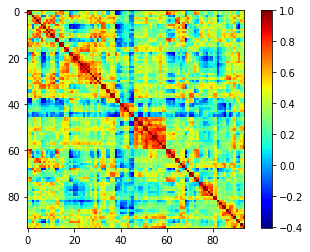

In [6]:
plt.imshow(person[0], cmap='jet')
plt.colorbar()

In [7]:
from sklearn.decomposition import NMF, PCA

In [118]:
# 个人认为最重要的参数是n_components、alpha、l1_ratio、solver
nmf = NMF(n_components=128,  # k value,默认会保留全部特征
          init=None,  # W H 的初始化方法，包括'random' | 'nndsvd'(默认) |  'nndsvda' | 'nndsvdar' | 'custom'.
          solver='cd',  # 'cd' | 'mu'
          beta_loss='frobenius',  # {'frobenius', 'kullback-leibler', 'itakura-saito'}，一般默认就好
          tol=1e-10,  # 停止迭代的极限条件
          max_iter=200,  # 最大迭代次数
          random_state=None,
          alpha=0.001,  # 正则化参数
          l1_ratio=0.001,  # 正则化参数
          verbose=0,  # 冗长模式
          shuffle=False  # 针对"cd solver"
          )

In [119]:
X = np.abs(trius)
nmf.fit(X)

NMF(alpha=0.001, beta_loss='frobenius', init=None, l1_ratio=0.001, max_iter=200,
    n_components=128, random_state=None, shuffle=False, solver='cd', tol=1e-10,
    verbose=0)

In [120]:
W = nmf.fit_transform(X)

In [121]:
H = nmf.components_

In [122]:
print('reconstruction_err_', nmf.reconstruction_err_)  # 损失函数值
print('n_iter_', nmf.n_iter_)  # 实际迭代次数

reconstruction_err_ 76.48216817541218
n_iter_ 199


In [27]:
from sklearn import manifold

In [28]:
from sklearn.metrics import euclidean_distances

In [29]:
mds = manifold.MDS(n_components=2, max_iter=1000, eps=1e-9, dissimilarity='precomputed')

In [80]:
X = mds.fit(euclidean_distances(W)).embedding_

In [105]:
pca = PCA(n_components=128)

In [106]:
P = pca.fit_transform(trius)

In [108]:
print(np.sum(pca.explained_variance_ratio_))

0.9218835717039182


In [109]:
np.save('pca.npy', P)

In [111]:
P[0]

array([-2.80604802, -1.93094077, -1.05886051,  1.65872022, -2.26695624,
        0.76549541,  1.54287705,  1.84084614,  0.07637085, -2.96498386,
       -0.07481665,  0.60090163, -0.40562427,  1.44486068,  0.3880071 ,
       -0.87801333,  0.68713415, -0.5705123 ,  1.39816069,  1.31806559,
       -0.22557979,  1.03276677,  0.09521676, -0.94009469,  0.4151313 ,
        0.07889282, -0.61246955,  1.12928791,  2.1048909 , -0.89100783,
        1.20568238,  0.77113922, -1.08283684,  0.67260455,  0.51386473,
        0.10545161, -0.27005239,  0.4004842 , -1.52555402, -1.79277309,
       -0.73394357, -1.2912843 ,  1.33073498,  0.07925093,  0.7181211 ,
        1.37103277,  0.08630907,  0.07081604, -0.30295068,  1.27088724,
        0.51914309,  1.28618905, -0.00957836, -0.44943743,  0.89903553,
        0.66248166,  0.06891089,  0.2896605 , -1.76963059,  0.17399882,
       -1.42142364,  0.48785895,  0.30019563, -0.57912117, -0.318836  ,
        1.65298287,  0.1250407 , -1.06973111, -0.66151662,  0.01

In [123]:
W[0]

array([0.00000000e+00, 3.81776158e-01, 4.65932630e-02, 0.00000000e+00,
       0.00000000e+00, 1.80594869e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.14640956e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.77628890e-01, 9.00676176e-01,
       0.00000000e+00, 7.92538770e-03, 0.00000000e+00, 6.16035341e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.11072997e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.49050911e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [36]:
from matplotlib import pyplot as plt

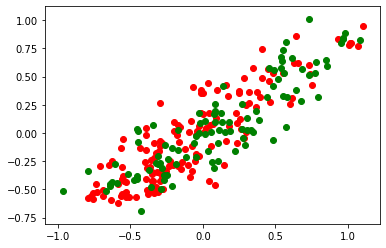

In [81]:
plt.figure()
plt.scatter(X[0:149, 0], X[0:149, 1], c='red')
plt.scatter(X[149:252, 0], X[149:252, 1], c='green')

In [89]:
tsne = manifold.TSNE(n_components=3)

In [93]:
X = tsne.fit_transform(trius)

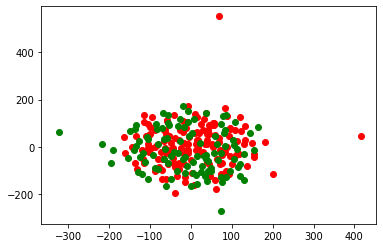

In [102]:
plt.figure()
plt.scatter(X[0:149, 0], X[0:149, 1], c='red')
plt.scatter(X[149:252, 0], X[149:252, 1], c='green')
plt.show()

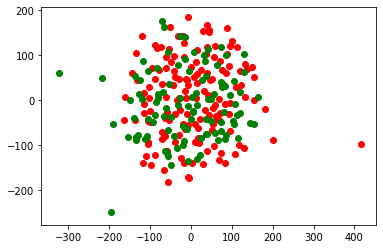

In [103]:
plt.figure()
plt.scatter(X[0:149, 0], X[0:149, 2], c='red')
plt.scatter(X[149:252, 0], X[149:252, 2], c='green')
plt.show()

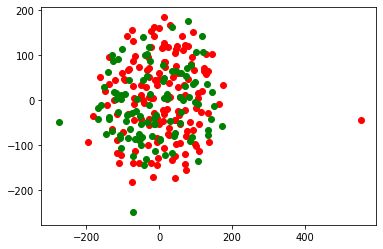

In [104]:
plt.figure()
plt.scatter(X[0:149, 1], X[0:149, 2], c='red')
plt.scatter(X[149:252, 1], X[149:252, 2], c='green')
plt.show()